Setup and downloading dependencies

In [2]:
!pip install -q kaggle


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [3]:
!mkdir ~/.kaggle

In [4]:
!touch ~/.kaggle/kaggle.json

In [6]:
api_token = {"username":"altafsayeed", "key":"c9422b9d1da4e2e014068913d9e8e2d2"}

In [7]:
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

Downloading and extracting chest xray dataset

In [9]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

100%|█████████████████████████████████████▉| 2.29G/2.29G [00:34<00:00, 77.7MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [00:36<00:00, 67.0MB/s]


In [10]:
import zipfile
with zipfile.ZipFile('./chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

Function to get a random image

In [27]:
import glob
import random
import matplotlib.pyplot as plt

def get_random_image(dir, condition):
    placeholder=''
    if condition == 'n':
        placeholder = 'NORMAL'
    elif condition == 'p':
        placeholder = 'PNEUMONIA'
    else:
        raise Exception("Sorry, invalid condition")
    folder=f"./data/chest_xray/{dir}/{placeholder}/*.jpeg"
    img_paths = glob.glob(folder)
    max_length = len(img_paths)
    randomNumber = random.randint(0, max_length)
    
    for index, item in enumerate(img_paths, start=1):
        if index==randomNumber:
            print(index, item)
            image=plt.imread(item)
            readyImage = plt.imshow(image)
            plt.show()
            return readyImage

2 ./data/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg


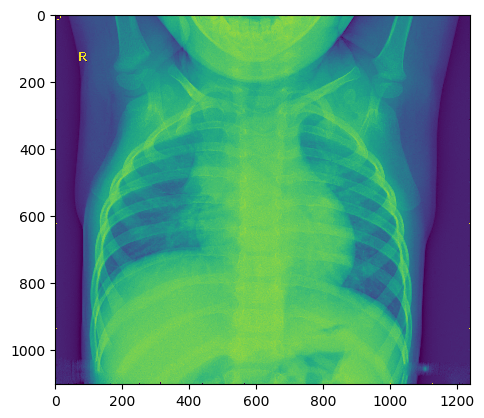

In [59]:
get_random_image("val", "n")

In [2]:
from PIL import Image

image = Image.open('data/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg')
print(image.format)
print(image.size)
print(image.mode)

JPEG
(1564, 1302)
L


In [3]:
import PIL.Image

rgba_image=PIL.Image.open('data/chest_xray/val/NORMAL/Screen Shot 2022-10-29 at 9.50.46 PM.png')
rgb_image = rgba_image.convert('RGB')
print(rgb_image.mode)

RGB


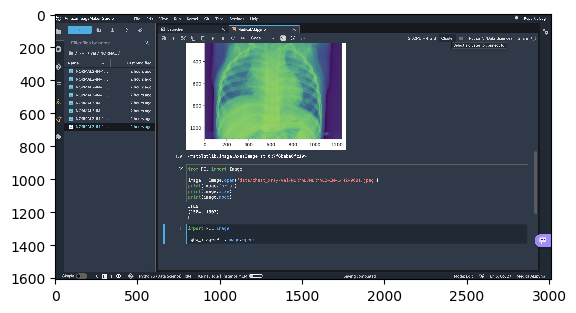

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('data/chest_xray/val/NORMAL/Screen Shot 2022-10-29 at 9.50.46 PM.png')
imgplot = plt.imshow(img)
plt.show()

Resizing all images in the dataset to (224, 224) to fit AWS specifications

In [6]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder='./data/chest_xray/train/*/*.jpeg'

counterPneu = 0
counterNormal = 0

img_paths = glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_pneumonia' + str(counterPneu) + '.jpeg', arr = im, format='jpeg', cmap='gray')
        counterPneu+=1
    else: 
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_normal' + str(counterNormal) + '.jpeg', arr = im, format='jpeg', cmap='gray')
        counterNormal+=1
        

In [7]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder='./data/chest_xray/test/*/*.jpeg'

counterPneu = 0
counterNormal = 0

img_paths = glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_pneumonia' + str(counterPneu) + '.jpeg', arr = im, format='jpeg', cmap='gray')
        counterPneu+=1
    else: 
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_normal' + str(counterNormal) + '.jpeg', arr = im, format='jpeg', cmap='gray')
        counterNormal+=1

In [8]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder='./data/chest_xray/val/*/*.jpeg'

counterPneu = 0
counterNormal = 0

img_paths = glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_pneumonia' + str(counterPneu) + '.jpeg', arr = im, format='jpeg', cmap='gray')
        counterPneu+=1
    else: 
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_normal' + str(counterNormal) + '.jpeg', arr = im, format='jpeg', cmap='gray')
        counterNormal+=1

Start creating the DataFrame for Visualization

In [2]:
import glob
import pandas as pd

folder='./data/chest_xray/*/*.jpeg'

category = []
condition_of_lung = []
filenames = []

all_files = glob.glob(folder)

for filename in all_files:
    if "train" in filename: 
        if "pneumonia" in filename: 
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename: 
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "test" in filename: 
        if "pneumonia" in filename: 
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename: 
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "val" in filename: 
        if "pneumonia" in filename: 
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename: 
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("normal")
            
all_data_df = pd.DataFrame({"dataset type": category, "x-ray result": condition_of_lung, "filename": filenames})
print(all_data_df.head())


  dataset type x-ray result                                       filename
0         test       normal       ./data/chest_xray/test/test_normal4.jpeg
1         test    pneumonia    ./data/chest_xray/test/test_pneumonia1.jpeg
2         test    pneumonia  ./data/chest_xray/test/test_pneumonia359.jpeg
3         test    pneumonia  ./data/chest_xray/test/test_pneumonia197.jpeg
4         test       normal     ./data/chest_xray/test/test_normal103.jpeg


Creating Bar Graphs to visualize how many pictures of each type we have

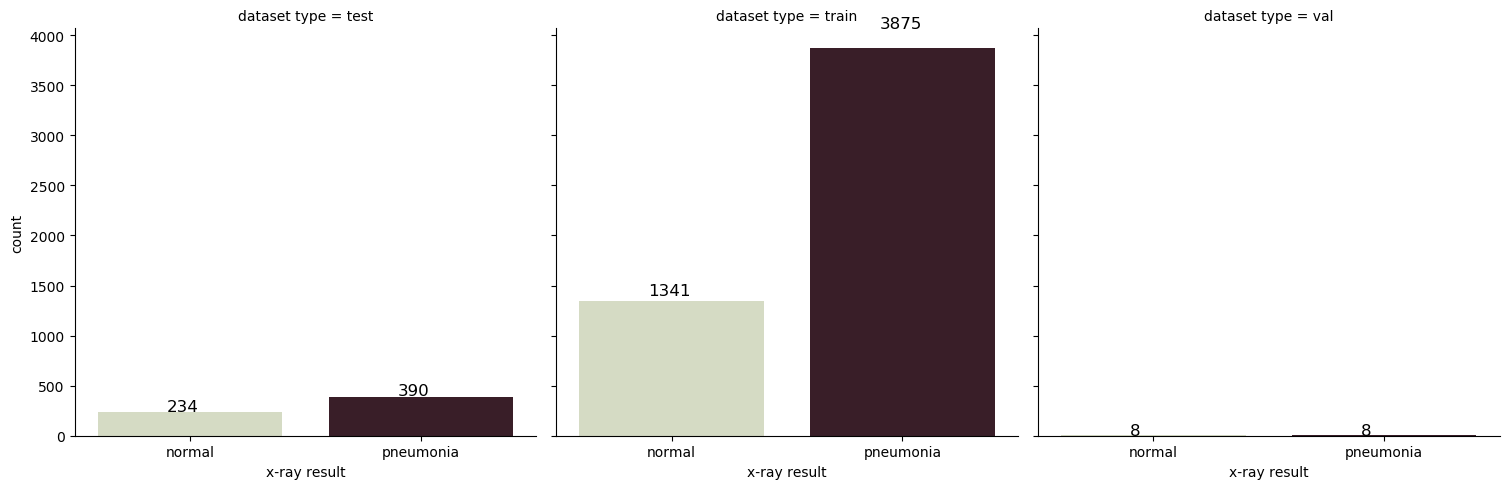

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(x="x-ray result", col="dataset type", kind = "count", palette="ch:.55", data = all_data_df, legend = True)

for i in range(0, 3):
    ax = g.facet_axis(0, i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3, 
        p.get_height()*1.05, 
        '{0:.0f}'.format(p.get_height()),
        color='black',
        rotation = 'horizontal',
        size = 'large')
plt.show()

Creating Pandas DataFrame for .lst files

In [2]:
import glob
import pandas as pd
import os
train_folder = './data/chest_xray/train/*.jpeg'
train_df_lst = pd.DataFrame(columns=['labels', 's3_path'], dtype=object)
train_imgs_path = glob.glob(train_folder)
counter = 0
class_arg = ''

for i in train_imgs_path:
    if "pneumonia" in i:
        class_arg = 1
    else: 
        class_arg = 0
    train_df_lst.loc[counter] = [class_arg, os.path.basename(i)] #basename is just file name
    counter+=1
print(train_df_lst.head())

  labels                   s3_path
0      0     train_normal1203.jpeg
1      1  train_pneumonia3349.jpeg
2      1   train_pneumonia478.jpeg
3      1  train_pneumonia1567.jpeg
4      1  train_pneumonia2296.jpeg


In [3]:
import glob
import pandas as pd
import os
test_folder = './data/chest_xray/test/*.jpeg'
test_df_lst = pd.DataFrame(columns=['labels', 's3_path'], dtype=object)
test_imgs_path = glob.glob(test_folder)
counter = 0
class_arg = ''

for i in test_imgs_path:
    if "pneumonia" in i:
        class_arg = 1
    else: 
        class_arg = 0
    test_df_lst.loc[counter] = [class_arg, os.path.basename(i)] #basename is just file name
    counter+=1
print(test_df_lst.head())

  labels                 s3_path
0      0       test_normal4.jpeg
1      1    test_pneumonia1.jpeg
2      1  test_pneumonia359.jpeg
3      1  test_pneumonia197.jpeg
4      0     test_normal103.jpeg


Creating functions that save our DataFrames as .lst files

In [4]:
def save_to_lst(df, prefix):     #takes in dataframe and prefix(either train or test)
    return df[["labels", "s3_path"]].to_csv(
    f"{prefix}.lst", sep = '\t', index = True, header = False
    )

save_to_lst(train_df_lst.copy(), "train")
save_to_lst(test_df_lst.copy(), "test")

Creating S3 bucket and linking it to notebook, then uploading the train and test images and train.lst / test.lst files to S3 bucket

In [5]:
bucket = 'medical-ai-chest-xray3'
print("bucket: {}".format(bucket))
region = 'us-west-2'
print("region: {}".format(region))
roleArn = 'arn:aws:s3:::medical-ai-chest-xray3'
print("roleArn: {}".format(roleArn))

bucket: medical-ai-chest-xray3
region: us-west-2
roleArn: arn:aws:s3:::medical-ai-chest-xray3


In [3]:
import os

os.environ["DEFAULT_S3_BUCKET"] = bucket


Specifying where we want to upload the files

In [4]:
!aws s3 sync ./data/chest_xray/train s3://${DEFAULT_S3_BUCKET}/train/


The user-provided path ./data/chest_xray/train does not exist.


In [5]:
!aws s3 sync ./data/chest_xray/test s3://${DEFAULT_S3_BUCKET}/test/


The user-provided path ./data/chest_xray/test does not exist.


Uploading .lst files using boto3

In [6]:
import boto3

boto3.Session().resource('s3').Bucket(bucket).Object("train.lst").upload_file('./train.lst')

In [7]:
boto3.Session().resource('s3').Bucket(bucket).Object("test.lst").upload_file('./test.lst')

Setting up Estimator object (Estimator is the object that we're going to give to AWS with the specifications that we want and how it should train the model), which is going to hold the algorithm's docker image where the image classifier is located. We're going to pull that docker image from AWS's elastic container registry (ecr). 

In [6]:
import sagemaker
from sagemaker import image_uris
import boto3
from sagemaker import get_execution_role
sess = sagemaker.Session()

algorithm_image = image_uris.retrieve(        # pulling docker image for image classifier from amazon
    region = boto3.Session().region_name,
    framework = "image-classification"
)

s3_output_location = f"s3://{bucket}/models/image_model"    # where the trained model will be stored
print(algorithm_image)

433757028032.dkr.ecr.us-west-2.amazonaws.com/image-classification:1


In [9]:
role = get_execution_role()
print(role)

arn:aws:iam::899346019506:role/service-role/AmazonSageMaker-ExecutionRole-20221029T182526


Start defining estimator

In [10]:
img_classifier_model = sagemaker.estimator.Estimator(
    algorithm_image,
    role = role,
    instance_count = 1,    # number of EC2 instances we're using for training. 1 is enough for the amount of data we have
    instance_type = "ml.p2.xlarge",
    volume_size = 50,                    # size in GB of EBS volume (AWS storage service)
    max_run = 432000,                   # timeout in seconds for training
    input_mode = "File",
    output_path = s3_output_location,
    sagemaker_session = sess         # an object that manages interactions with AWS SageMaker APIs and any other AWS service
    
)

print(img_classifier_model)

Start setting up hyperparameter tuning. A hyperparameter is a parameter whose value is set before the learning process begins. The model will start the training process with these set parameters.

In [11]:
import glob

count = 5216

# for filepath in glob.glob('./data/chest_xray/train/*jpeg'):
  #  count +=1
# print(count)        # number of training pictures

In [12]:
img_classifier_model.set_hyperparameters(
    image_shape = '3,224,224',
    num_classes = 2,              # either pneumonia or normal
    use_pretrained_model = 1,     # turns on transfer learning
    num_training_samples = count,
    augmentation_type = 'crop_color_transform', # this applies random augmentations like rotations, shearings, etc. to the images.
    epochs = 50,                  # epoch = one complete pass of the training dataset through the algorithm. The more epochs,
                                  # the better the model, but will cost more resources/money
    early_stopping = True,        # if our model doesn't improve, it will stop before the 50 epoch
    early_stopping_min_epochs = 45,
    early_stopping_patience = 5,   # num of epochs to wait before ending training if no improvements are made
    early_stopping_tolerance = 0.0,
    
    lr_scheduler_factor = 0.1,       # decreases learning rate by 0.1 (as we're getting closer to ideal solution, take smaller steps)
    lr_scheduler_step = '25,30,35' # implement schedule factor at these epochs
)

Next, we will specify the dynamic hyperparameters that we want to tune (learning rate, mini-batch size, and optimizer that we use)

Some definitions - 

Continuous Parameter: We have to give the learning rate a lower bound and upper bound. We're telling SageMaker that for every single training job, it should look at values between 0.01 and 0.1 for the learning rate (best learning rate parameters)

Categorical Parameter: Looks at each number individually rather than it being a range like ContinuousParameter

Learning rate: How big of a step the model should take when calculating the new gradient from the derivative. Learning rate should not be too small or too big or the model may run too slow or it may shoot over the global minima.

Derivative: A continuous description of how a function changes with small changes in one or multiple variables.

Mini-batch: The number of training examples in one forward and backward pass

sgd: Gradient descent is an optimization algorithm that’s used when training a machine learning model. It’s based on a convex function and tweaks its parameters iteratively to minimize a given function to its local minimum.

adam (adaptive moment estimation): Another optimization algorithm like sgd. The method is really efficient when working with large problem involving a lot of data or parameters. It requires less memory and is efficient.

In [13]:
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner

hyperparameter_ranges = {
    "learning_rate": ContinuousParameter(0.04, 0.08),
    "mini_batch_size": CategoricalParameter([16, 32]), # small enough to fit into memory, but big enough so that the model doesn't converge and oscillate everywhere
    "optimizer": CategoricalParameter(["adam", "sgd"]) # telling SageMaker hyperparameter that when you try to find the global minima, use these 2 optimizers
}

Now we will define some boilerplate code, and then we also have to define the objective metric that we will look at during training, how many tuning jobs we want to set, and how many parallel jobs we want to do.

In [14]:
objective_metric_name = "validation:accuracy"
objective_type = "Maximize"      # telling model that we want to maximize the accuracy
max_jobs = 5                   # train the whole model 5 times with different hyperparameters
max_parallel_jobs = 1         # 1 is enough for our dataset


Set tuner with estimator we have defined and other properties we have defined

In [15]:
tuner = HyperparameterTuner(estimator = img_classifier_model,
                            objective_metric_name = objective_metric_name,
                            hyperparameter_ranges = hyperparameter_ranges,
                            objective_type = objective_type,
                            max_jobs = max_jobs,
                            max_parallel_jobs = max_parallel_jobs
                           )

Next, before calling fit() on the tuner, we have to specify where the model inputs (training images) are, and the names of the training jobs

In [16]:
from sagemaker.session import TrainingInput

model_inputs = {
    "train": sagemaker.inputs.TrainingInput(s3_data = f"s3://{bucket}/train", content_type = "application/x-image"), # training images location
    "validation": sagemaker.inputs.TrainingInput(s3_data = f"s3://{bucket}/test", content_type = "application/x-image"), # test images location
    "train_lst": sagemaker.inputs.TrainingInput(s3_data = f"s3://{bucket}/train.lst", content_type = "application/x-image"), # train.lst location
    "validation_lst": sagemaker.inputs.TrainingInput(s3_data = f"s3://{bucket}/test.lst", content_type = "application/x-image") # test.lst location
}

Giving unique job names

In [19]:
import time
job_name_prefix = "classifier7"
timestamp = time.strftime("-%Y-%m-%d-%H-%M-%S", time.gmtime())
job_name = job_name_prefix+timestamp

fit() method starts the training

In [ ]:
tuner.fit(inputs = model_inputs, job_name = job_name, logs = True)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

5 training jobs took 21 hours.
The best training job had a validation accuracy of 84.2%
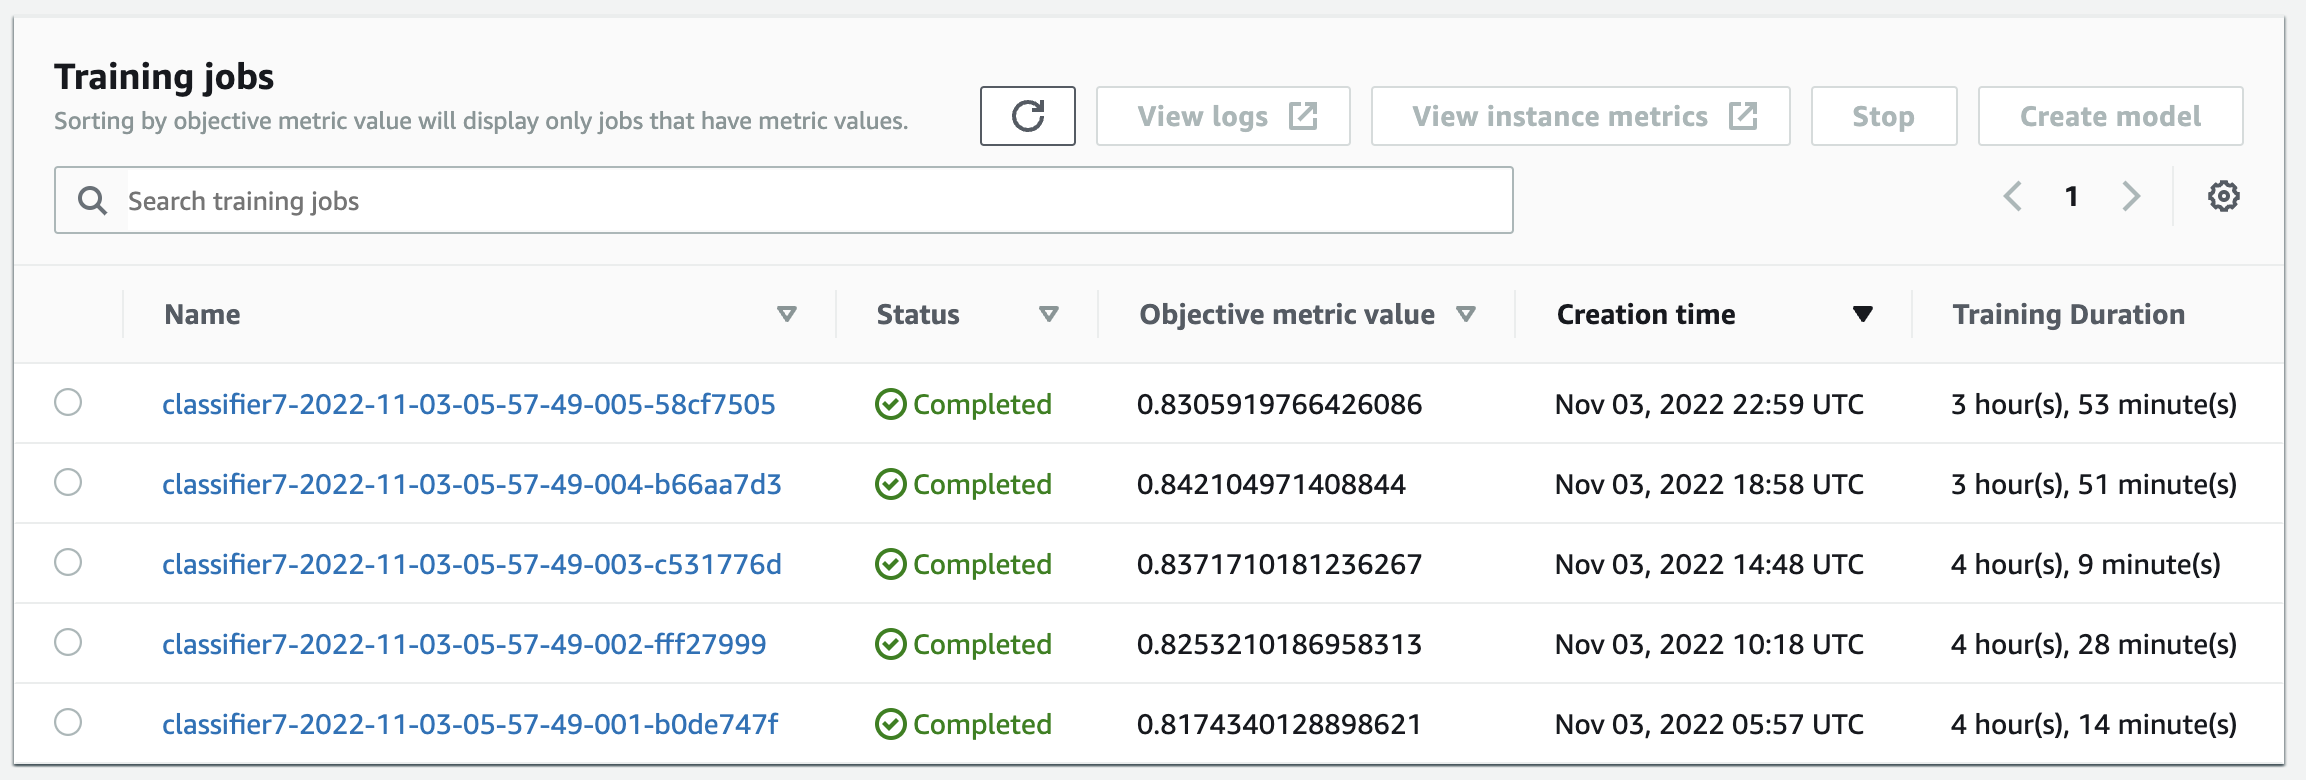


Now we will locally deploy the best model.

In [2]:
import sagemaker
from sagemaker import get_execution_role

In [3]:
role = get_execution_role()

Defining model.

In [7]:
model = sagemaker.model.Model(
image_uri = algorithm_image,
model_data = 's3://medical-ai-chest-xray3/models/image_model/classifier7-2022-11-03-05-57-49-004-b66aa7d3/output/model.tar.gz',
role = role)

Deploying the endpoint.

In [8]:
endpoint_name = 'Demo-image-classifier-Pneumonia'

deployment = model.deploy(
initial_instance_count = 1,
instance_type = 'ml.m4.xlarge',
endpoint_name = endpoint_name)

----------!

Doing some inference on the data in validation folder

In [9]:
from sagemaker.predictor import Predictor
predictor = Predictor("Demo-image-classifier-Pneumonia")

In [22]:
from sagemaker.serializers import IdentitySerializer
import base64

file_name = 'data/chest_xray/val/val_normal0.jpeg'

predictor.serializer = IdentitySerializer("image/jpeg")
with open(file_name, "rb") as f:
    payload = f.read()
    
inference = predictor.predict(data=payload)
print(inference)

b'[0.999524712562561, 0.0004753164539579302]'


In [23]:
import glob
import json
import numpy as np
file_path = 'data/chest_xray/val/*.jpeg'
files = glob.glob(file_path)

y_true=[]
y_pred=[]

def make_pred():
    for file in files:
        if "normal" in file:
            with open(file, "rb") as f:
                payload = f.read()
                inference = predictor.predict(data=payload).decode("utf-8")
                result = json.loads(inference)
                predicted_class = np.argmax(result)
                y_true.append(0)
                y_pred.append(predicted_class)
        elif "pneumonia" in file:
            with open(file, "rb") as f:
                payload = f.read()
                inference = predictor.predict(data=payload).decode("utf-8")
                result = json.loads(inference)
                predicted_class = np.argmax(result)
                y_true.append(1)
                y_pred.append(predicted_class)
                
make_pred()
print(y_true)
print(y_pred)
    

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]


After running some local inference, out of the 16 pictures in the validation folder, 15 predictions were matches and 1 was a miss. The model is working well.

Creating the confusion matrix.

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[7, 1],
       [0, 8]])

Top left: true positive, top right: false positive. Bottom left: false negative, bottom right: true negative

We have one false positive, and zero false negatives. It's important to minimize the amount of false negatives, because thinking that you don't have pneumonia when you actually do can be dangerous.

Now we will create the classification report.

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



The metrics are looking good.